### YouTube Analysis
- Data pulled from YouTube using its API (_YouTube Data API v3_)
- Content related to the following YouTube channels:
 - Curbal
 - techTFQ
 - Alex The Analyst
 - Corey Schafer
 - Guy in a Cube


In [19]:
# Importing the required libraries
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build


In [20]:
# Getting the YouTube service
api_key = 'xxxxxx'   #  <--- Replace it with your API key
api_service_name = 'youtube'
api_version = 'v3'
youtube = build(api_service_name, api_version, developerKey = api_key)


In [56]:
# Creating a list of the YouTube channels
channels = ['UCJ7UhloHSA4wAqPzyi6TOkw',
            'UCnz-ZXXER4jOvuED5trXfEA',
            'UC7cs8q-gJRlGwj4A8OmCmXg',
            'UCCezIgC97PvUuR4_gbFUs5g',
            'UCFp1vaKzpfvoGai0vE5VJ0w'
           ]


---

Getting high level statistics of all the channels (number of views, subscribers and videos):

In [57]:
# Creating a function to pull data from the channels
def getChannelData(channel_ids):
    ids = ','.join(channel_ids)   # Joining all the channel ids
    request = youtube.channels().list(
                part = 'snippet,contentDetails,statistics',
                id = ids)
    response = request.execute()
    
    data = dict()
    all_channels = list()
    for i in range(0, len(response['items'])):
        data['Channel'] = response['items'][i]['snippet']['title']
        data['Subscribers'] = response['items'][i]['statistics']['subscriberCount']
        data['Videos'] = response['items'][i]['statistics']['videoCount']
        data['Views'] = response['items'][i]['statistics']['viewCount']
        all_channels.append(data.copy())
    return all_channels
    

In [85]:
# Inspecting the data generated by the function above
stats_all_channels = getChannelData(channels)
stats_all_channels


[{'Channel': 'Corey Schafer',
  'Subscribers': '907000',
  'Videos': '230',
  'Views': '70423275'},
 {'Channel': 'Guy in a Cube',
  'Subscribers': '249000',
  'Videos': '737',
  'Views': '18818205'},
 {'Channel': 'techTFQ',
  'Subscribers': '58900',
  'Videos': '53',
  'Views': '2445466'},
 {'Channel': 'Alex The Analyst',
  'Subscribers': '189000',
  'Videos': '134',
  'Views': '7300645'},
 {'Channel': 'Curbal',
  'Subscribers': '90400',
  'Videos': '870',
  'Views': '11921298'}]

In [86]:
# Creating a dataframe based on the dictionary extracted from the API
df_stats = pd.DataFrame(stats_all_channels)
df_stats


,Channel,Subscribers,Videos,Views
0,Corey Schafer,907000,230,70423275
1,Guy in a Cube,249000,737,18818205
2,techTFQ,58900,53,2445466
3,Alex The Analyst,189000,134,7300645
4,Curbal,90400,870,11921298


In [87]:
# Checking data types
df_stats.dtypes


Channel        object
Subscribers    object
Videos         object
Views          object
dtype: object

In [133]:
# Converting the columns 'Views', 'Subscribers', and 'Videos' to integer
df_stats['Subscribers'] = df_stats['Subscribers'].astype(int)
df_stats['Videos'] = df_stats['Videos'].astype(int)
df_stats['Views'] = (df_stats['Views'].astype(int)) / 1000  # Views numbers are usually quite high. Diving it by 1000 for ease of use 
df_stats.dtypes


Channel         object
Subscribers      int64
Videos           int64
Views          float64
dtype: object

---

Analysing the metrics extracted from YouTube so far:

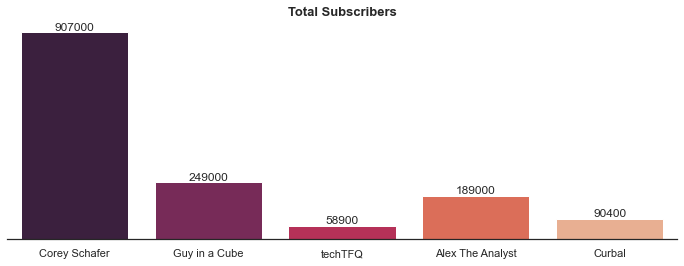

In [134]:
# Plotting the number of 'Subscribers' for all the channels
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel', y = 'Subscribers', data = df_stats, palette = 'rocket')
ax.set_title('Total Subscribers', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


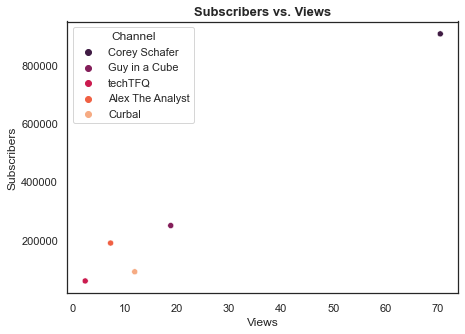

In [135]:
# Visualising Subscribers vs. Views
sns.set(rc = {'figure.figsize': (7, 5)})
sns.set_style(style = 'white') 
ax = sns.scatterplot(data = df_stats, x = "Views", y = "Subscribers", hue = 'Channel', palette = 'rocket')
ax.set_title('Subscribers vs. Views', weight = 'semibold').set_fontsize('13')
plt.show()


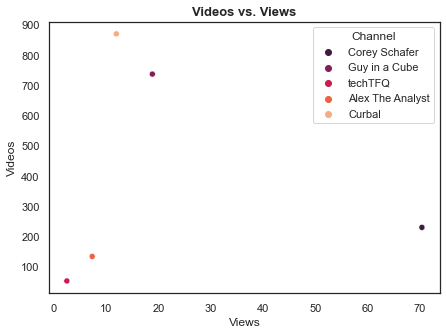

In [136]:
# Visualising Videos vs. Views
sns.set(rc = {'figure.figsize': (7, 5)})
sns.set_style(style = 'white') 
ax = sns.scatterplot(data = df_stats, x = "Views", y = "Videos", hue = 'Channel', palette = 'rocket')
ax.set_title('Videos vs. Views', weight = 'semibold').set_fontsize('13')
plt.show()


---

It seems that Subscribers and Views have a __positive__ correlation. Let's visualise it:

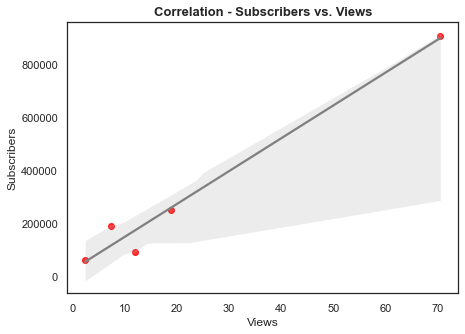

In [137]:
# Plotting the correlation between Subscribers and Views
ax = sns.regplot(x = 'Views', y = 'Subscribers', data = df_stats, scatter_kws = {'color':'red'}, line_kws = {'color':'grey'})
ax.set_title('Correlation - Subscribers vs. Views', weight = 'semibold').set_fontsize('13')


In fact, Subscribers and Views are the only metrics positively correlated. The other metrics have a negative correlation, as shown in the following Correlation Matrix:

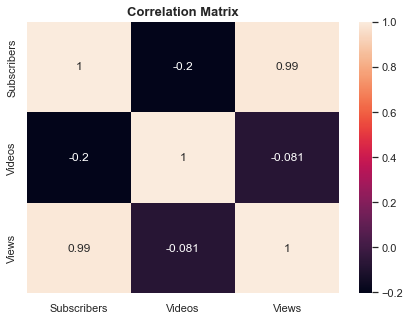

In [138]:
# Generating a correlation matrix
ax = sns.heatmap(df_stats.corr(), annot= True)
ax.set_title('Correlation Matrix', weight = 'semibold').set_fontsize('13')


---

Reference:
- https://www.youtube.com/watch?v=SwSbnmqk3zY